In [1]:
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

# Aula 15: Visualização de Dados
**Objetivo da aula:** ao fim desta aula, o aluno será capaz de usar ferramentas de visualização gráfica para mostrar graficamente o conteúdo de coleções.

# Exercício 1
*Objetivo: usar um plano cartesiano para mostrar dados*

Usando um plano cartesiano (desenhe manualmente!), mostre os dados de seus colegas de turma quando os eixos são:
1. O peso e altura
1. Altura e idade

O que os gráficos mostram sobre a relação entre essas medidas?

## Carregar dados

# Exercício 2
*Objetivo: interpretar gráficos de dispersão para antever o resultado de classificadores*

O código abaixo faz a fatoração NMF de alguns elementos do IMDB dataset para um espaço de 2 tópicos.

1. O que cada ponto da figura significa
1. O que significa o eixo horizontal? E o eixo vertical?



In [2]:
df = pd.read_csv('./datasets/IMDB Dataset.csv').sample(1000)
df.head()


,review,sentiment
11000,"In our household, we are enormous fans of A Ch...",positive
5284,"After having seen and loved Postal (yes, I act...",negative
29393,A May day 1938 when happen a huge rally celebr...,positive
7157,I can't believe I actually spent almost three ...,negative
40156,I wondered why I didn't like Peggy Sue Got Mar...,negative


In [3]:
n_components = 2
vectorizer = CountVectorizer(binary=True, max_features=400, min_df=0.01, max_df=0.4)
X = vectorizer.fit_transform(list(df['review']))
print(X.shape)
nmf = NMF(n_components=n_components, init='nndsvda', random_state=42)
y = nmf.fit_transform(X.toarray())

# a1 = nmf.components_[:, vectorizer.vocabulary_['director']]

(1000, 400)


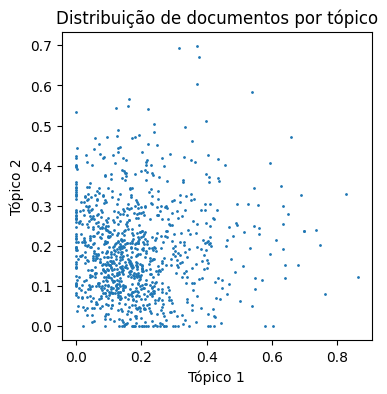

In [4]:
# Documentos e seus tópicos
plt.figure(figsize=(4,4))
plt.scatter(y[:,0], y[:,1], s=1)
plt.title('Distribuição de documentos por tópico')
plt.ylabel('Tópico 2')
plt.xlabel('Tópico 1')
plt.show()

# Exercício 3
*Objetivo: entender como cores podem ser usadas para mostrar características qualitativas de dispersões*

O código a seguir adiciona cores ao gráfico que fizemos anteriormente.

1. Na figura seguinte, o que significam as cores?
1. Olhando a figura, você acredita que os tópicos são características relevantes para fazer a classificação de documentos de acordo com seu sentimento?

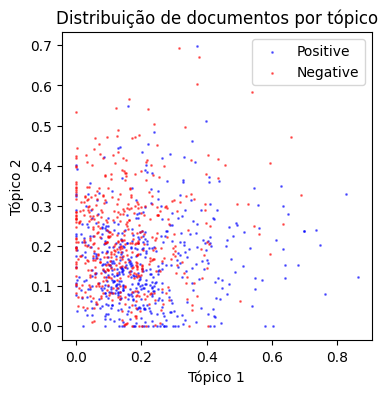

In [5]:
# Usar cores
sent = list(df['sentiment'])
yp = np.array([y[i,:] for i in range(len(sent)) if sent[i]=='positive'])
yn = np.array([y[i,:] for i in range(len(sent)) if sent[i]=='negative'])
plt.figure(figsize=(4,4))
plt.scatter(yp[:,0], yp[:,1], s=1, c='b', alpha=0.5, label='Positive')
plt.scatter(yn[:,0], yn[:,1], s=1, c='r', alpha=0.5, label='Negative')
plt.title('Distribuição de documentos por tópico')
plt.ylabel('Tópico 2')
plt.xlabel('Tópico 1')
plt.legend()
plt.show()

# Exercício 4
*Objetivo: usar overlays para criar referências na visualização*

1. O que significa cada ponto na figura criada abaixo?
1. Parecem existir agrupamentos de palavras ou distribuições típicas?
1. A figura mostra palavras escritas em suas posições. Como isso ajuda a interpretar o gráfico?

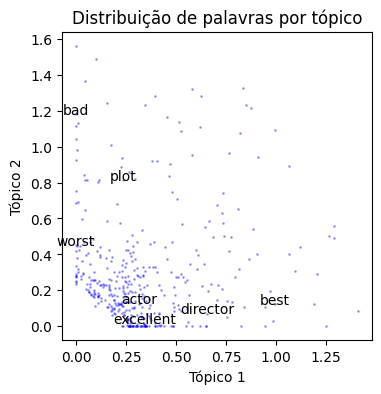

In [6]:
# Mostrando algumas palavras em overlay
v = nmf.components_
plt.figure(figsize=(4,4))
plt.scatter(v[0,:], v[1,:], s=1, alpha=0.3, c='b')
for s in ["director", "actor", "bad", "excellent", "plot", "worst", "best"]:
    _n = vectorizer.vocabulary_[s]
    plt.text(v[0,_n], v[1,_n], s, ha='center')
plt.title('Distribuição de palavras por tópico')
plt.ylabel('Tópico 2')
plt.xlabel('Tópico 1')
plt.show()

# Exercício 5
*Objetivo: explicar a necessidade de fazer uma projeção em dimensão mais baixa*

No código abaixo, fazemos uma regressão por tópicos.

Por que, neste caso, é mais difícil visualizar as dimensões da variável `y`?

In [7]:
n_components = 60
vectorizer = CountVectorizer(binary=True, max_features=400, min_df=0.01, max_df=0.4)
X = vectorizer.fit_transform(list(df['review']))
print(X.shape)
nmf = NMF(n_components=n_components, init='nndsvda')
y = nmf.fit_transform(X.toarray())

(1000, 400)


# Exercício 6
*Objetivo: explicar a projeção PCA*

A ideia da projeção PCA é que os dados ($X$) estão distribuidos de forma que suas dimensões se correlacionam. Então, teríamos algo como:

In [8]:
x1 = np.random.random(100)

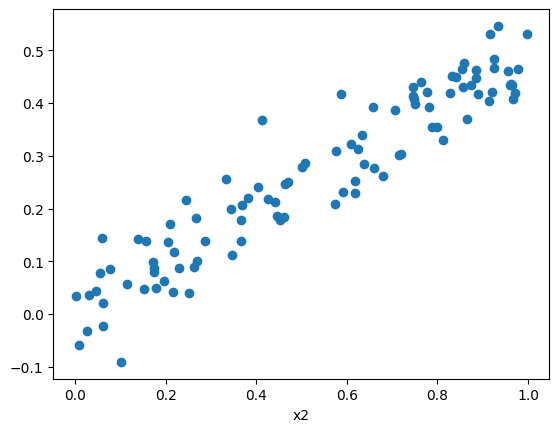

In [9]:
r=0.5
x2 = r*x1 + 0.05*np.random.randn(100)
plt.figure()
plt.scatter(x1,x2)
plt.xlabel('x1')
plt.xlabel('x2')
plt.show()

O desafio de PCA é encontrar uma projeção desses dados que permita encontrar as direções nas quais os dados mais se distribuem, e, ao mesmo tempo, garantir que as dimensões encontradas são ortogonais entre si. No caso acima, teríamos:

[]

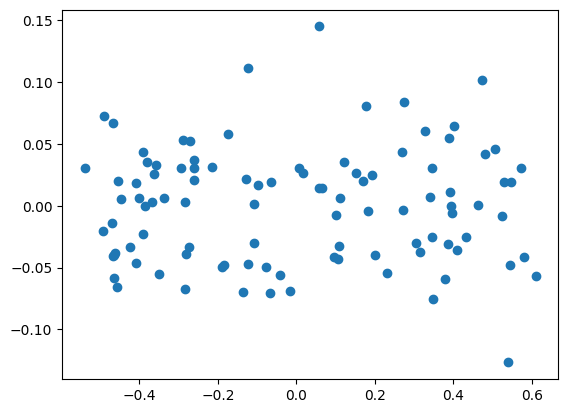

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
pca = PCA(2)
X = np.array([x1, x2]).T
y = pca.fit_transform(X)
plt.figure()
plt.scatter(y[:,0], y[:,1])
plt.plot()

Use a applet sobre PCA em https://setosa.io/ev/principal-component-analysis/ para visualizar como PCA se comporta em várias situações.

1. Na primeira figura deste exercício, quais são as direções principais?
1. Como a projeção PCA se comporta quando mudamos o valor de $r$? Por que?

# Exercício 7
*Objetivo: aplicar a projeção PCA para reduzir dimensões*

Podemos usar PCA para reduzir a dimensionalidade de um conjunto de dados para um espaço de dimensão $n$. Para isso:
* Realizamos a projeção PCA
* Escolhemos somente as $n$ direções com maior variação dos dados

Por exemplo:

[]

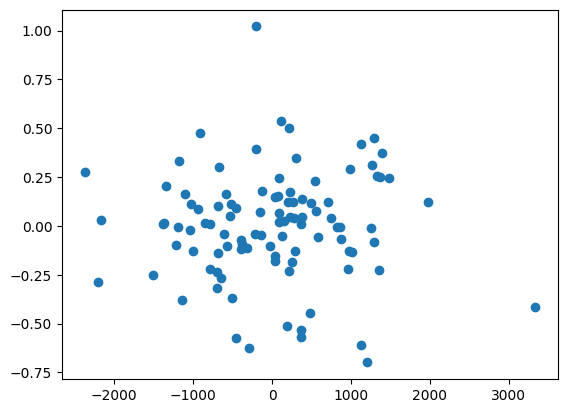

In [11]:
x1 = 0*np.random.randn(100)
x2 = 0.2*np.random.randn(100)
x3 = 0.3*np.random.randn(100)
x4 = 1000*np.random.randn(100)
pca = PCA(2)
X = np.array([x1, x2,x3,x4]).T
y = pca.fit_transform(X)
plt.figure()
plt.scatter(y[:,0], y[:,1])
plt.plot()

Podemos visualizar os componentes principais usando:

In [12]:
print(pca.components_)

[[-0.00000000e+00  1.50234571e-05 -4.28650382e-05  9.99999999e-01]
 [-0.00000000e+00 -3.35009400e-01 -9.42214785e-01 -3.53550734e-05]]


1. O que significa cada elemento da matriz em `pca.components_`?
1. Como a projeção se comporta quando alteramos os coeficientes multiplicativos de x1, x2, x3 e x4?

# Exercício 8
*Objetivo: usar a projeção PCA para visualizar espaços de tópicos de alta dimensão*

1. Usando PCA, mostre uma visualização do espaço de tópicos gerado por uma regressão em tópicos com muitos tópicos.
1. Compare essa visualização com aquela obtida por um espaço de tópicos criado com dois tópicos.

(1000, 400)


/home/user/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


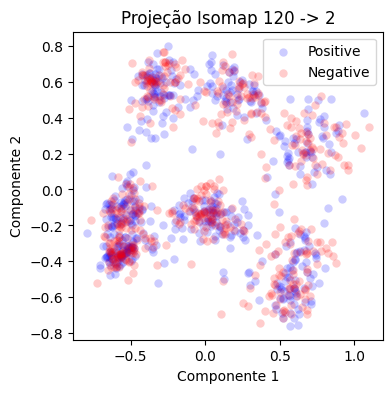

In [13]:
n_components = 120
vectorizer = CountVectorizer(binary=True, max_features=400, min_df=0.01, max_df=0.4)
X = vectorizer.fit_transform(list(df['review']))
print(X.shape)
nmf = NMF(n_components=n_components, init='nndsvda', random_state=42)
y = nmf.fit_transform(X.toarray())

pca = Isomap(n_components= 2)

y = pca.fit_transform(y)
sent = list(df['sentiment'])
yp = np.array([y[i,:] for i in range(len(sent)) if sent[i]=='positive'])
yn = np.array([y[i,:] for i in range(len(sent)) if sent[i]=='negative'])
plt.figure(figsize=(4,4))
plt.scatter(yp[:,0], yp[:,1], alpha=0.2, c='b', lw=0, label='Positive')
plt.scatter(yn[:,0], yn[:,1], alpha=0.2, c='r', lw=0, label='Negative')
plt.title('Projeção Isomap 120 -> 2')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.legend()
plt.show()


# Exercício 9
*Objetivo: usar a projeção PCA para comparar diferentes espaços vetoriais*

Podemos argumentar que NMF provavelmente retira informações importantes de nossa projeção.

Usando PCA, visualize o espaço gerado pelo `vectorizer`, isto é, mostre a projeção PCA da saída do vetorizador. Como ele se compara com o espaço gerado pelo NMF?

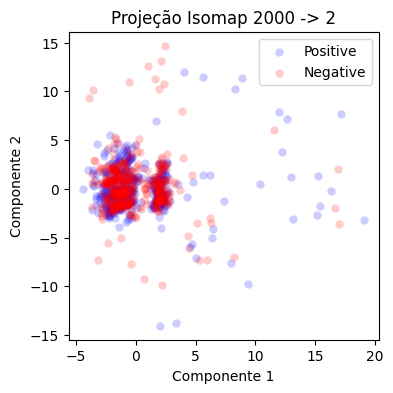

In [14]:
vectorizer = CountVectorizer(binary=True, max_features=2000, min_df=0.01, max_df=0.4)
X = vectorizer.fit_transform(list(df['review']))
pca = Isomap(n_components= 2)
y = pca.fit_transform(X.toarray())
sent = list(df['sentiment'])
yp = np.array([y[i,:] for i in range(len(sent)) if sent[i]=='positive'])
yn = np.array([y[i,:] for i in range(len(sent)) if sent[i]=='negative'])
plt.figure(figsize=(4,4))
plt.scatter(yp[:,0], yp[:,1], alpha=0.2, c='b', lw=0, label='Positive')
plt.scatter(yn[:,0], yn[:,1], alpha=0.2, c='r', lw=0, label='Negative')
plt.title('Projeção Isomap 2000 -> 2')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.legend()
plt.show()

(1000, 400)


/home/user/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


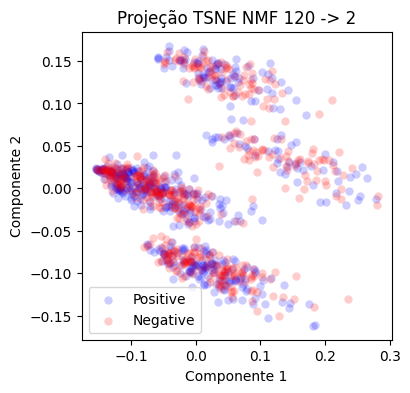

In [19]:
# vectorizer = CountVectorizer(binary=True, max_features=2000, min_df=0.01, max_df=0.4)
# X = vectorizer.fit_transform(list(df['review']))
# pca = TSNE(n_components= 2, perplexity=30)
# y = pca.fit_transform(X.toarray())
# sent = list(df['sentiment'])
# yp = np.array([y[i,:] for i in range(len(sent)) if sent[i]=='positive'])
# yn = np.array([y[i,:] for i in range(len(sent)) if sent[i]=='negative'])
# plt.figure(figsize=(4,4))
# plt.scatter(yp[:,0], yp[:,1], alpha=0.2, c='b', lw=0, label='Positive')
# plt.scatter(yn[:,0], yn[:,1], alpha=0.2, c='r', lw=0, label='Negative')
# plt.title('Projeção TSNE CV 2000 -> 2')
# plt.ylabel('Componente 2')
# plt.xlabel('Componente 1')
# plt.legend()
# plt.show()

n_components = 120
vectorizer = CountVectorizer(binary=True, max_features=400, min_df=0.01, max_df=0.4)
X = vectorizer.fit_transform(list(df['review']))
print(X.shape)
nmf = NMF(n_components=n_components, init='nndsvda', random_state=42)
y = nmf.fit_transform(X.toarray())
pca = PCA(n_components= 2)
y = pca.fit_transform(y)
sent = list(df['sentiment'])
yp = np.array([y[i,:] for i in range(len(sent)) if sent[i]=='positive'])
yn = np.array([y[i,:] for i in range(len(sent)) if sent[i]=='negative'])
plt.figure(figsize=(4,4))
plt.scatter(yp[:,0], yp[:,1], alpha=0.2, c='b', lw=0, label='Positive')
plt.scatter(yn[:,0], yn[:,1], alpha=0.2, c='r', lw=0, label='Negative')
plt.title('Projeção TSNE NMF 120 -> 2')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.legend()
plt.show()

# Exercício 10
*Objetivo: interpretar a visualização de dados em diferentes datasets*

Escolha um outro conjunto de dados. Aplique os processos de visualização que aprendemos para visualizar a coleção de documentos e como as palavras se organizam. Após, mostre sua visualização para os colegas.


In [16]:
df2 = pd.read_csv('./datasets/spam_ham_dataset.csv').sample(3000).drop('Unnamed: 0', axis = 1).reset_index().drop('index', axis=1)
df2

,label,text,label_num
0,ham,Subject: re : basin production from ga 213\nva...,0
1,spam,Subject: mystery shopping - extra casual incom...,1
2,ham,"Subject: hpl noms . for dec . 29 , 2000\n( see...",0
3,ham,Subject: neon discussion february 7\nhere ' s ...,0
4,ham,"Subject: schedule / jerseys\nhello team ,\ni '...",0
...,...,...,...
2995,ham,Subject: buyback deals - - january 2000\nattac...,0
2996,spam,"Subject: re : your account # ln 869\nhi ,\ni s...",1
2997,ham,Subject: june transport usage tickets\ni updat...,0
2998,spam,Subject: boxcar plutarch roof\ni ' ve been usi...,1


/home/user/.local/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 8 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/user/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/user/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/user/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/user/.loc

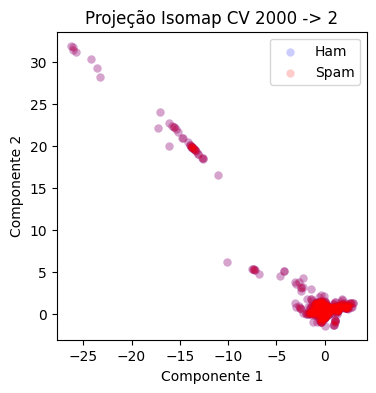

(3000, 400)


/home/user/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/home/user/.local/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 10 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/user/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/user/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/user/.local/lib/python3.8/site-packages/sci

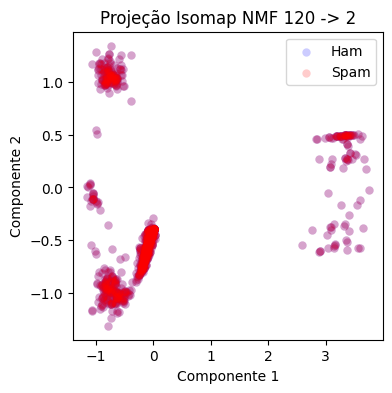

In [17]:
vectorizer = CountVectorizer(binary=True, max_features=2000, min_df=0.01, max_df=0.4)
X = vectorizer.fit_transform(list(df2['text']))
pca = Isomap(n_components= 2)
y = pca.fit_transform(X.toarray())
sent = list(df2['label_num'])
yp = np.array([y[i,:] for i in range(len(sent)) if sent[i]])
yn = np.array([y[i,:] for i in range(len(sent)) if sent[i]])
plt.figure(figsize=(4,4))
plt.scatter(yp[:,0], yp[:,1], alpha=0.2, c='b', lw=0, label='Ham')
plt.scatter(yn[:,0], yn[:,1], alpha=0.2, c='r', lw=0, label='Spam')
plt.title('Projeção Isomap CV 2000 -> 2')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.legend()
plt.show()

n_components = 120
vectorizer = CountVectorizer(binary=True, max_features=400, min_df=0.01, max_df=0.4)
X = vectorizer.fit_transform(list(df2['text']))
print(X.shape)
nmf = NMF(n_components=n_components, init='nndsvda', random_state=42)
y = nmf.fit_transform(X.toarray())

pca = Isomap(n_components= 2)

y = pca.fit_transform(y)
yp = np.array([y[i,:] for i in range(len(sent)) if sent[i]])
yn = np.array([y[i,:] for i in range(len(sent)) if sent[i]])
plt.figure(figsize=(4,4))
plt.scatter(yp[:,0], yp[:,1], alpha=0.2, c='b', lw=0, label='Ham')
plt.scatter(yn[:,0], yn[:,1], alpha=0.2, c='r', lw=0, label='Spam')
plt.title('Projeção Isomap NMF 120 -> 2')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.legend()
plt.show()

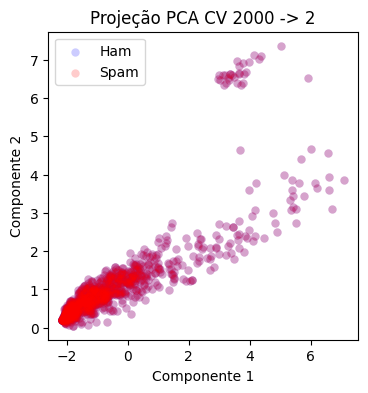

(3000, 400)


/home/user/.local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


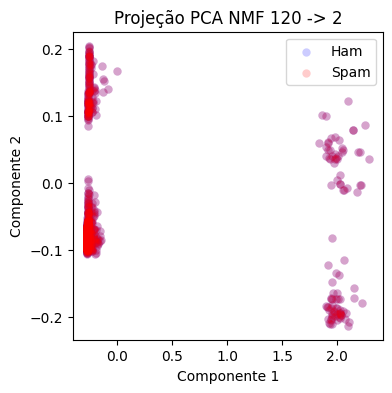

In [18]:
vectorizer = CountVectorizer(binary=True, max_features=2000, min_df=0.01, max_df=0.4)
X = vectorizer.fit_transform(list(df2['text']))
pca = PCA(2)
y = pca.fit_transform(X.toarray())
sent = list(df2['label_num'])
yp = np.array([y[i,:] for i in range(len(sent)) if sent[i]])
yn = np.array([y[i,:] for i in range(len(sent)) if sent[i]])
plt.figure(figsize=(4,4))
plt.scatter(yp[:,0], yp[:,1], alpha=0.2, c='b', lw=0, label='Ham')
plt.scatter(yn[:,0], yn[:,1], alpha=0.2, c='r', lw=0, label='Spam')
plt.title('Projeção PCA CV 2000 -> 2')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.legend()
plt.show()

n_components = 120
vectorizer = CountVectorizer(binary=True, max_features=400, min_df=0.01, max_df=0.4)
X = vectorizer.fit_transform(list(df2['text']))
print(X.shape)
nmf = NMF(n_components=n_components, init='nndsvda', random_state=42)
y = nmf.fit_transform(X.toarray())

pca = PCA(2)

y = pca.fit_transform(y)
yp = np.array([y[i,:] for i in range(len(sent)) if sent[i]])
yn = np.array([y[i,:] for i in range(len(sent)) if sent[i]])
plt.figure(figsize=(4,4))
plt.scatter(yp[:,0], yp[:,1], alpha=0.2, c='b', lw=0, label='Ham')
plt.scatter(yn[:,0], yn[:,1], alpha=0.2, c='r', lw=0, label='Spam')
plt.title('Projeção PCA NMF 120 -> 2')
plt.ylabel('Componente 2')
plt.xlabel('Componente 1')
plt.legend()
plt.show()

# Exercício 11
*Objetivo: analisar as possibilidades e as limitações das figuras que montamos*

Analisando as figuras que foram geradas por você e seus colegas durante esta aula, reflita:

1. Quais informações relevantes podemos extrair desse tipo de análise?
1. Quais são as limitações desta forma de análise, isto é, quais seriam informações que não podemos tirar delas?
